In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

#from __future__ import print_function
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\youcef\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#importer les données
train = pd.read_csv('C://Users//youcef//Desktop//MS-AAB//Cours_python//examen//train.csv')

In [3]:
train=train.drop('Unnamed: 0' , axis = 1 )
#enlever les colonnes qui ont na
train=train.drop('Employment_Info_1' , axis = 1 )
train=train.drop('Employment_Info_4' , axis = 1 )
train=train.drop('Employment_Info_6' , axis = 1 )
train=train.drop('Insurance_History_5' , axis = 1 )
train=train.drop('Family_Hist_2' , axis = 1 )
train=train.drop('Family_Hist_3' , axis = 1 )
train=train.drop('Family_Hist_4' , axis = 1 )
train=train.drop('Family_Hist_5' , axis = 1 )
train=train.drop('Medical_History_1' , axis = 1 )
train=train.drop('Medical_History_10' , axis = 1 )
train=train.drop('Medical_History_15' , axis = 1 )
train=train.drop('Medical_History_24' , axis = 1 )
train=train.drop('Medical_History_32' , axis = 1 )

In [4]:
print(train)

          V1     Id  Product_Info_1 Product_Info_2  Product_Info_3  \
0          1      2               1             D3              10   
1          2      5               1             A1              26   
2          3      6               1             E1              26   
3          4      7               1             D4              10   
4          5      8               1             D2              26   
5          6     11               1             A8              10   
6          7     14               1             D2              26   
7          8     15               1             D3              26   
8          9     16               1             E1              21   
9         10     18               1             D4              26   
10        11     19               1             A2              26   
11        12     20               2             D1              26   
12        13     22               1             D4              26   
13        14     23 

In [5]:
#remplçer les na par la moyen de la ligne
#train.fillna(train.mean())

In [6]:
#tester si il ya des na
train.isnull().any().any()

False

In [7]:
np.isnan(train.any()) 

V1                     False
Id                     False
Product_Info_1         False
Product_Info_2         False
Product_Info_3         False
Product_Info_4         False
Product_Info_5         False
Product_Info_6         False
Product_Info_7         False
Ins_Age                False
Ht                     False
Wt                     False
BMI                    False
Employment_Info_2      False
Employment_Info_3      False
Employment_Info_5      False
InsuredInfo_1          False
InsuredInfo_2          False
InsuredInfo_3          False
InsuredInfo_4          False
InsuredInfo_5          False
InsuredInfo_6          False
InsuredInfo_7          False
Insurance_History_1    False
Insurance_History_2    False
Insurance_History_3    False
Insurance_History_4    False
Insurance_History_7    False
Insurance_History_8    False
Insurance_History_9    False
                       ...  
Medical_Keyword_20     False
Medical_Keyword_21     False
Medical_Keyword_22     False
Medical_Keywor

In [8]:
train.Product_Info_2.unique()
train [ "Product_Info_2num"] = train.Product_Info_2.astype('category').cat.codes

print(train.Product_Info_2num)
train=train.drop('Product_Info_2', axis = 1 )

0        16
1         0
2        18
3        17
4        15
5         7
6        15
7        16
8        18
9        17
10        1
11       14
12       17
13        6
14       17
15       16
16       16
17       17
18       15
19        0
20       17
21        1
22       14
23        5
24        0
25       16
26       17
27       16
28       16
29       14
         ..
51351    16
51352     5
51353     7
51354     6
51355    15
51356    17
51357    15
51358    16
51359    16
51360    16
51361    17
51362    16
51363    17
51364     0
51365    17
51366    15
51367    15
51368    14
51369    14
51370    18
51371    17
51372    14
51373    16
51374    16
51375    17
51376    17
51377    10
51378    14
51379    18
51380    15
Name: Product_Info_2num, Length: 51381, dtype: int8


In [9]:
train.target.unique()
train [ "target2"] = train.target.astype('category').cat.codes

print(train.target2)
train=train.drop('target', axis = 1 )

0        1
1        0
2        1
3        1
4        1
5        1
6        0
7        1
8        0
9        0
10       0
11       0
12       1
13       0
14       1
15       0
16       0
17       1
18       1
19       0
20       0
21       1
22       0
23       1
24       0
25       1
26       0
27       0
28       0
29       0
        ..
51351    1
51352    1
51353    0
51354    0
51355    0
51356    0
51357    0
51358    0
51359    0
51360    0
51361    0
51362    0
51363    0
51364    0
51365    0
51366    0
51367    0
51368    0
51369    1
51370    0
51371    1
51372    0
51373    0
51374    0
51375    1
51376    0
51377    1
51378    0
51379    1
51380    1
Name: target2, Length: 51381, dtype: int8


In [10]:
print(train)

          V1     Id  Product_Info_1  Product_Info_3  Product_Info_4  \
0          1      2               1              10        0.076923   
1          2      5               1              26        0.076923   
2          3      6               1              26        0.076923   
3          4      7               1              10        0.487179   
4          5      8               1              26        0.230769   
5          6     11               1              10        0.166194   
6          7     14               1              26        0.076923   
7          8     15               1              26        0.230769   
8          9     16               1              21        0.076923   
9         10     18               1              26        0.230769   
10        11     19               1              26        0.102564   
11        12     20               2              26        0.487179   
12        13     22               1              26        0.487179   
13    

In [11]:
from sklearn.cross_validation import train_test_split
x=train.iloc[:,1:115]
y=train.target2

C:\Users\youcef\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [14]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
data_independ = sm.add_constant(x_train, prepend=False)

In [16]:
glm_binom = sm.GLM(y_train, data_independ, family=sm.families.Binomial())


In [17]:
res = glm_binom.fit()

In [18]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                target2   No. Observations:                35966
Model:                            GLM   Df Residuals:                    35851
Model Family:                Binomial   Df Model:                          114
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -14247.
Date:                Fri, 29 Dec 2017   Deviance:                       28494.
Time:                        15:45:50   Pearson chi2:                 4.00e+04
No. Iterations:                     9                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Id                   5.647e-07   6.41e-07      0.881      0.378   -6.91e-07    1.82e-06
Product_Info_1         -0

In [19]:
print('Parameters: ', res.params)
print('T-values: ', res.tvalues)

Parameters:  Id                     5.646783e-07
Product_Info_1        -8.389429e-01
Product_Info_3        -3.616025e-03
Product_Info_4         9.048176e-01
Product_Info_5        -5.228045e-01
Product_Info_6        -4.868930e-02
Product_Info_7         1.209994e-01
Ins_Age               -3.900884e-01
Ht                     8.272183e+00
Wt                    -1.446493e+01
BMI                   -2.761498e+00
Employment_Info_2     -1.236914e-03
Employment_Info_3     -6.108063e-02
Employment_Info_5      1.521401e-01
InsuredInfo_1         -1.537191e-01
InsuredInfo_2         -3.216021e+00
InsuredInfo_3         -3.045417e-03
InsuredInfo_4          7.537288e-02
InsuredInfo_5         -4.559567e-01
InsuredInfo_6          4.141418e-01
InsuredInfo_7         -4.144182e-01
Insurance_History_1   -2.368951e-01
Insurance_History_2   -3.275579e-01
Insurance_History_3    2.409459e-01
Insurance_History_4    5.815356e-02
Insurance_History_7    7.120920e-02
Insurance_History_8    9.419678e-02
Insurance_Histo

(array([  5.00000000e+00,   4.30000000e+01,   1.89000000e+02,
          4.78000000e+02,   9.24000000e+02,   1.56600000e+03,
          2.49100000e+03,   3.44800000e+03,   4.37600000e+03,
          6.95600000e+03,   3.70600000e+03,   7.46000000e+02,
          2.80800000e+03,   3.08800000e+03,   2.19700000e+03,
          1.42300000e+03,   7.25000000e+02,   4.09000000e+02,
          1.92000000e+02,   1.03000000e+02,   4.90000000e+01,
          2.70000000e+01,   1.40000000e+01,   1.00000000e+00,
          2.00000000e+00]),
 array([-3.08826824, -2.7837509 , -2.47923356, -2.17471623, -1.87019889,
        -1.56568155, -1.26116421, -0.95664687, -0.65212953, -0.34761219,
        -0.04309485,  0.26142249,  0.56593983,  0.87045717,  1.17497451,
         1.47949185,  1.78400919,  2.08852653,  2.39304387,  2.6975612 ,
         3.00207854,  3.30659588,  3.61111322,  3.91563056,  4.2201479 ,
         4.52466524]),
 <a list of 25 Patch objects>)

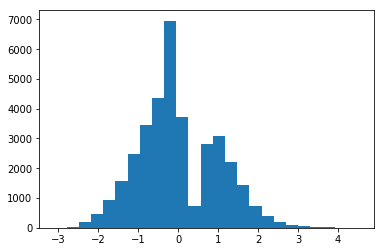

In [20]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)

In [58]:
#QQ Plot of Deviance Residuals:

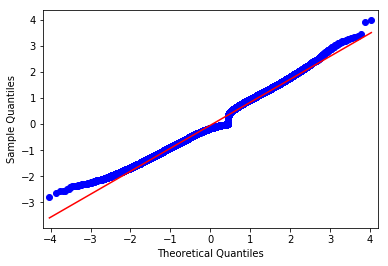

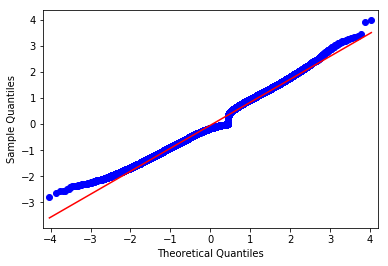

In [21]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

In [23]:
nobs = res.nobs

In [33]:
y = train.target2[:,]/train.target2.sum()

In [34]:
yhat = res.mu

In [35]:
from statsmodels.graphics.api import abline_plot

ValueError: x and y must be the same size

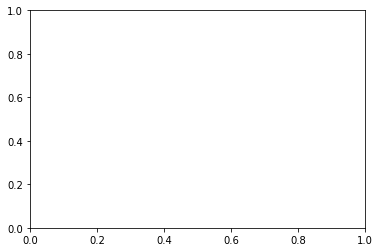

In [39]:
fig, ax = plt.subplots()
ax.scatter(yhat, y)
